# Uninsurance and Racial Demographics

Looking at just the uninsurace dataset, we noticed that the most uninsured counties seem to be geographically clustered.
These clusters were most prevalent along Texas's border with Mexico, almost all of Oklahoma, the Four Corners area, and southwest South Dakota.
A covariance analysis seemed to inidcate that several racial factors were at play, especially amoung Hispanics and Native Americans.

Since the original dataset did not provide overall county demographic information, only dmepgraphics amoung uninsured people, we obtained data from the US Census Bureau to aid our analysis and confirm our hypothesis that race was at play.
We combined this data with data about how counties voted in elections, as we also suspected that political leanings played a part of uninsurance rates too.
These locations where these two racial groups are most dense are exactly the areas with high clusters of uninsurance.
Political leanings also played a role similar in magnitude to the racial groups.

In [202]:
import pandas as pd

# Load in the uninsured and census data
uninsured_census = pd.read_csv("./datasets/uninsured_census.csv", thousands=",").drop(columns=["Unnamed: 0"]).replace("**", 0)

In [203]:
# List out all the races and their fully-qualified name

races = {
    "IA": "American Indian & Alaska Native Alone", 
    "H": "Hispanic", 
    "HIAC": "Hispanic, American Indian, and Alaska Native", 
    "NHWA": "Not Hispanic White Alone", 
    "BAC":"Black or African American Alone", 
    "AAC":"Asian Alone or in Combination", 
    "NAC":"Hispanic, Native Hawaiian or Other Pacific Islander", 
    "IAC":"Hispanic, American Indian and Alaska Native alone or in Combination", 
    "TOM":"Two or More Races"
}

In [204]:
# Calculate the percent of various races in each county

for race in races:
    uninsured_census[f"percent_{race}"] = (uninsured_census[f"{race}_MALE"] + uninsured_census[f"{race}_FEMALE"]) / uninsured_census["TOT_POP"]

## Uninsurance Rate v. Race

Below are scatterplots of uninsurance rates versus the prevalence of various racial groups in each county.
We can see that the Native American and Hispanic racial groups have the most positive correlation with uninsurance rates, while non-Hispancic whites have the most negative correlation.

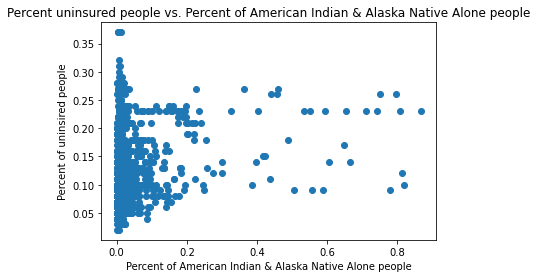

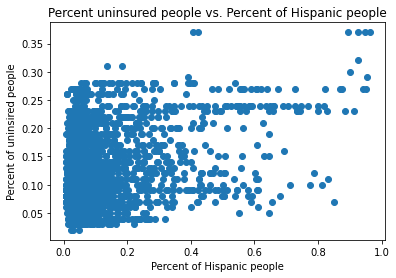

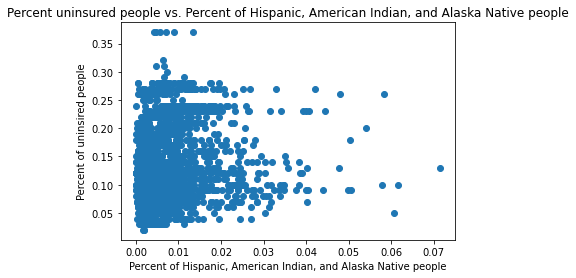

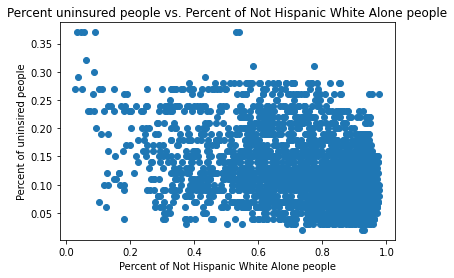

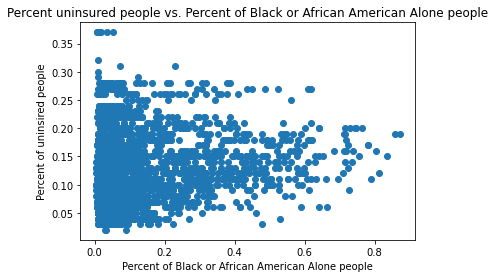

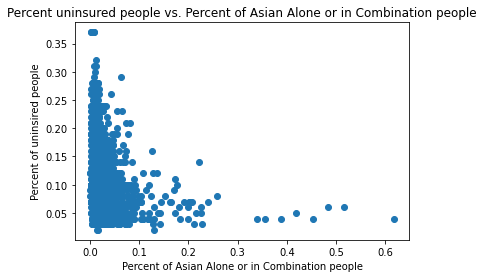

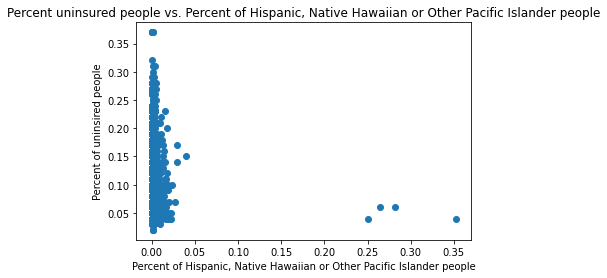

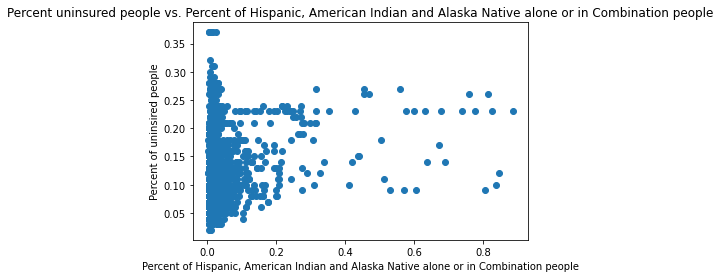

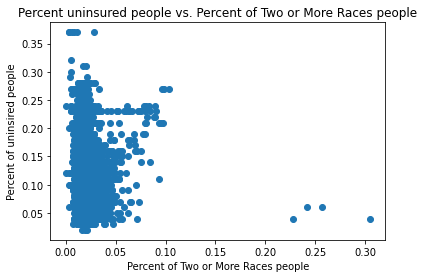

In [205]:
# Plot race and uninsurance rates

import matplotlib.pyplot as plt

for race in races:
    plt.scatter(uninsured_census[f"percent_{race}"], uninsured_census["Percent Uninsured"])
    plt.title(f"Percent uninsured people vs. Percent of {races[race]} people")
    plt.xlabel(f"Percent of {races[race]} people")
    plt.ylabel("Percent of uninsired people")
    plt.show()

In [206]:
# Keep only columns we're interested in: uninsurance, policical leaning, and race
no_categorical = uninsured_census[["Percent Uninsured", "per_gop", "per_dem", "cases"] + [f"percent_{race}" for race in races]]

## Covariance Analysis

Below we perform a covariance analysis with uninsurance rates to see which factors (race and political gorup) correlate most strongly.

In [207]:
import numpy as np

# Get the indices for the percent uninsured
pu_index = list(no_categorical.columns).index("Percent Uninsured")

# Calculate the correlation coefficient matrix
A = np.corrcoef(no_categorical, rowvar=False)

# Sort the variable's correlation with percent uninsured, in increasing order
x = sorted([(column_name, value) for column_name, value in zip(no_categorical.columns, A[pu_index])], key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 out (that aren't the percent uninsured itself)
for row in x[1:]:
    print(row)

('percent_NHWA', -0.3919891394966732)
('percent_H', 0.35011427166162556)
('per_gop', 0.2845425402877026)
('per_dem', -0.2684520358058623)
('percent_AAC', -0.2145451445922141)
('percent_HIAC', 0.198185309631582)
('percent_BAC', 0.18253767457937595)
('percent_IAC', 0.1665178300893234)
('percent_IA', 0.15696392285076793)
('cases', -0.08000067430020016)
('percent_NAC', -0.05321158389617299)
('percent_TOM', -0.013567696350438776)


### Race
As hypothesised and show in the plots above, non-Hispanic whites and Asians are the racial groups with the strongest negative correlation with uninsurance rates.
Meanwhile, Hispanics, Native Americans, and Blacks all have positive correlations.

### Politics
Also as hypothesised, the political leaning of a county correlates with uninsurance rates.
Counties that lean Republican have a positive correlation with uninsurance rates, while those that lean Democrat have a negative correlation.